In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from numpy import linalg as LA
from timeit import default_timer as timer
import math as M
import pandas as pd

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.data.shape)
A = wine.data
for i in range(A.shape[1]):
  A[:,i] =2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))-1

print(wine.target.shape)
C=np.unique(wine.target)
print(C)
n = wine.data.shape[0] 
d = wine.data.shape[1] 
y = 1.0*np.ones([A.shape[0],])
for i in range(wine.target.shape[0]):
  if wine.target[i]==1:
    y[i] = 1 
  else:
    y[i] = -1
y=y.reshape(n,1)



(178, 13)
(178,)
[0 1 2]


In [3]:
indexarr = np.arange(n) 
np.random.shuffle(indexarr) 
print(indexarr) 
p80=round(n*0.8)
q=list(indexarr[:p80])
r=list(indexarr[p80:])
train_data = (A[[q],:]).reshape(p80,d)
train_label = y[q].reshape(p80,1)
test_data = (A[[r],:]).reshape((n-p80),d)
test_label =y[r].reshape((n-p80),1)

[ 75 152 155  76 163 120 109  41  73  60  30  65   5  36 160 150  81 167
  19  90  12  17 143 118  95  88  42   4 107  99 112  15  91  57  63  56
   3 162  54 135 108 119  31 171 144  10 130   9  77 156  86  45  58  97
 131 121  66 174 166 111  34 151  79  80  46  92   0 142 126 154 132 165
   1 147 138 177 164  26 149 110 176 117  67 113 129 170   7 140 153 106
  37  40  53   8   2  71  89 141  50 148  83 102  20 136  43  23  24 128
 103  59 139 104 133  68  94 105  35 100 158 146  98 127 122  13 124  70
  49 137 114  48  64 173  55 175  47 125 123 116  82 172  22  33  28 157
  32  18  69  11  87  96 145   6  25  72 168  93 159  84  44  21  39  74
  85  61  14 161 134 169 115  38 101  51  52  27  16  78  29  62]


In [4]:
def predict(w,x):
  h_x=np.sign(np.dot(x,w))
  return h_x

In [5]:
def compute_accuracy(data,labels,model_w):
  prediction=predict(model_w,data)
  s=labels==prediction.reshape(len(labels),1)
  true_prediction = (s == True).sum()
  false_prediction = (s == False).sum()
  accuracy=true_prediction/len(s)
  return accuracy


In [6]:
def compute_orthogonal_projection(z):
  w=np.sign(z)*(np.minimum(1,np.abs(z)))
  d=len(w)
  return w.reshape(d,1)

#Hinge

In [7]:
def compute_loss_h(w,x,y):
  dp=np.dot(x,w)
  hinge_loss = np.mean([max(0, 1-y[i]*dp[i]) for i in range(len(y))])
  return hinge_loss

In [8]:
def compute_objfnval(data,labels,model_w,lamda):
  hinge_loss=compute_loss_h(model_w,data,labels)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + hinge_loss
  return objectfun

In [9]:
def compute_grad_loss_h(x,y,model_w,i,lamda):
   grad_h=[]
   d=x.shape[1]
   dp=np.dot(x,model_w); 
   condition = dp*y;
   if(condition[i] < 1):
     grad_h=-((x[i]*y[i]).reshape(d,1))+lamda*model_w
   elif(condition[i]>=1):
     grad_h=0+lamda*model_w
   return (grad_h.reshape(d,1))/len(y)

In [10]:
def OPT1_H(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)               
      t = t+1
      if t>10000:
        t = 1
    objfun_val.append(compute_objfnval(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc


In [11]:
nepochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
object_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_H(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  object_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(object_epoch_lamda).reshape(5,500)
test_accuracy_epoch_lamda=np.array(test_acc_epoch_lamda).reshape(5,500)
train_accuracy_epoch_lamda=np.array(train_acc_epoch_lamda).reshape(5,500)

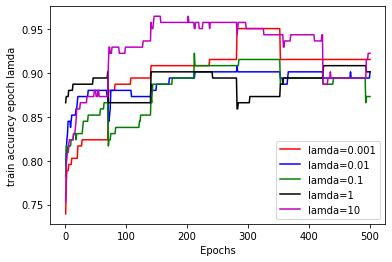

In [12]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

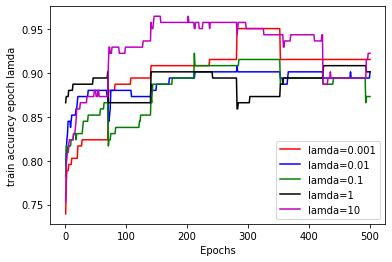

In [13]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

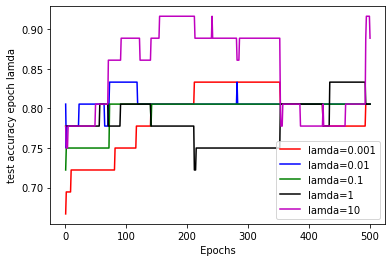

In [14]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [15]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [16]:
df = pd.DataFrame(data, columns = ['lamda values','final test acc','final train acc'])
df

lamda values  final test acc  final train acc
0         0.001        0.805556         0.915493
1         0.010        0.805556         0.901408
2         0.100        0.805556         0.873239
3         1.000        0.805556         0.901408
4        10.000        0.888889         0.922535

#Logistic

In [17]:
def compute_loss_L(x,y,w):
  dp=np.dot(x,w)
  logistic_loss = np.mean([np.log(1+np.exp(-(y[i]*dp[i]))) for i in range(len(y))])
  return logistic_loss

In [18]:
def compute_objfnval_L(data,labels,model_w,lamda):
  logistic_loss=compute_loss_L(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + logistic_loss
  return objectfun

In [19]:
def compute_grad_loss_L(x,y,w,i,lamda):
  dp=np.dot(x[i],w)
  d=x.shape[1]
  gradL=(((1+np.exp(-(y[i]*dp)))**(-1))*(np.exp(-(y[i]*dp))))*(x[i])*y[i]
  return (gradL.reshape(d,1))/len(y)

In [20]:
def OPT1_L(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc


In [21]:
nepochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_L(train_data,train_label,lamda[i], nepochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(5,500)
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(5,500)
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(5,500)

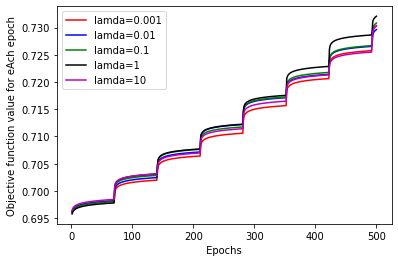

In [22]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

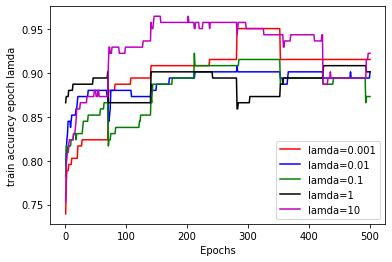

In [23]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()
plt.show()

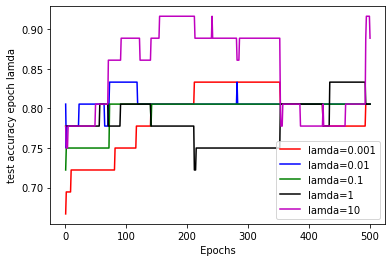

In [24]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()
plt.show()

In [25]:

data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.166667              0.084507
1         0.010             0.194444              0.098592
2         0.100             0.222222              0.119718
3         1.000             0.194444              0.098592
4        10.000             0.194444              0.098592

#SQ Hinge

In [26]:
def compute_loss_Sqh(x,y,w):
  dp=np.dot(x,w)
  squaredhinge_loss =np.mean([(max(0, 1-y[i]*dp[i]))**2 for i in range(len(y))])
  return squaredhinge_loss

1.

In [27]:
def compute_objfnval_Sqh(data,labels,model_w,lamda):
  squaredhinge_loss=compute_loss_Sqh(data,labels,model_w)
  objectfun=(0.5*lamda*((model_w**2).sum()))/len(labels) + squaredhinge_loss
  return objectfun

In [28]:
def compute_grad_loss_Sqh(x,y,model_w,i,lamda):
   grad_Sh=[]
   d=x.shape[1]
   dp=np.dot(x,model_w); # w*xi
   condition = dp*y;
   if(condition[i] < 1):
     grad_Sh=(2*(1-condition[i])*(-((x[i]*y[i])))).reshape(d,1)+lamda*model_w
   elif(condition[i]>=1):
     grad_Sh=0+lamda*model_w
   return (grad_Sh.reshape(d,1))/len(y)

In [29]:
def OPT1_Sqh(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N) 
  for epoch in range(num_epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x     
      w=compute_orthogonal_projection(w1)                
      t = t+1
      if t>10000:
        t = 1
    obj_fun_val.append(compute_objfnval_L(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc


In [30]:
num_epochs=500
lamda = [10**(-3), 10**(-2), 0.1, 1, 10]
objval_epoch_lamda=[]
test_acc_epoch_lamda=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_lamda=[]
for i in range(len(lamda)):
  values=OPT1_Sqh(train_data,train_label,lamda[i], num_epochs,test_data,test_label)
  objval_epoch_lamda.append(values[1])
  test_acc_epoch_lamda.append(values[2])
  train_acc_epoch_lamda.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_lamda=np.array(obj_val_epoch_lamda).reshape(5,500)
test_acc_epoch_lamda=np.array(test_accuracy_epoch_lamda).reshape(5,500)
train_acc_epoch_lamda=np.array(train_accuracy_epoch_lamda).reshape(5,500)

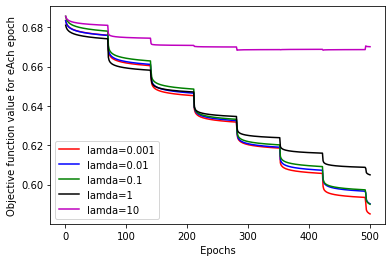

In [31]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, objval_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, objval_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, objval_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, objval_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for eAch epoch")
plt.legend()

plt.show()

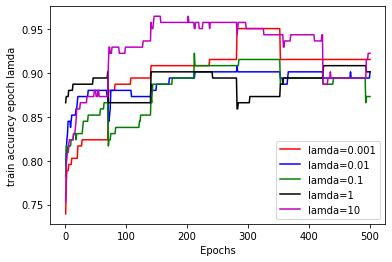

In [32]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, train_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, train_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, train_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, train_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch lamda")
plt.legend()

plt.show()

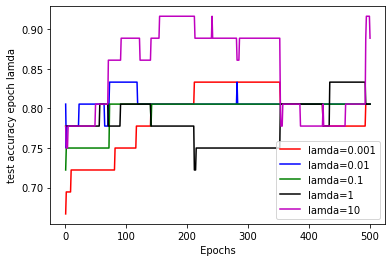

In [33]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_lamda[0],  color='r', label='lamda=0.001')
plt.plot(epochs, test_acc_epoch_lamda[1],  color='b', label='lamda=0.01')
plt.plot(epochs, test_acc_epoch_lamda[2],  color='g', label='lamda=0.1')
plt.plot(epochs, test_acc_epoch_lamda[3],  color='k', label='lamda=1')
plt.plot(epochs, test_acc_epoch_lamda[4],  color='m', label='lamda=10')


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch lamda")
plt.legend()

plt.show()

In [34]:
import pandas as pd
data=[]
for i in range(len(lamda)):
  data.append([lamda[i],final_test_acc[i],final_train_acc[i]])

In [35]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [36]:
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.777778              0.908451
1         0.010             0.888889              0.964789
2         0.100             0.861111              0.936620
3         1.000             0.805556              0.908451
4        10.000             0.666667              0.852113